# **UniCEUB - Pós gracuação em Ciência de Dados e Machine Learning - Projeto Final**

Alunas:
- Mariana Ramírez Diaz
- Zelia Santos Porto

Projeto: Sistema de recomendação de jogos com base no perfil do jogador usando a metodologia CRISP-DM

Objetivo: Criar um modelo de aprendizado supervisionado que recomende os 5 jogos mais adequados para um jogador com base em seus dados pessoais e comportamentais, como idade, gênero, frequência de jogo, dispositivos utilizados, gêneros favoritos e motivos para jogar.




**1. Problema de negócio - Business Understanding:**

A indústria de jogos eletrônicos tem se consolidado como um dos setores mais expressivos do mercado global de entretenimento. Com milhares de títulos disponíveis, abrangendo diversos gêneros e estilos, torna-se um desafio para os usuários identificar quais jogos estão mais alinhados às suas preferências pessoais. Este problema é ainda mais evidente para novos jogadores ou usuários com pouca interação prévia em plataformas digitais, situação em que sistemas tradicionais de recomendação baseados em histórico de consumo apresentam baixa efetividade.

Diante desse cenário, propõe-se o desenvolvimento de um sistema de recomendação de jogos eletrônicos que utilize informações demográficas e comportamentais declaradas pelos próprios usuários, a fim de oferecer sugestões personalizadas e coerentes com seus perfis.

Esse tipo de solução pode ser especialmente útil para empresas de jogos, plataformas de streaming interativo, ou serviços de assinatura que desejem oferecer experiências mais individualizadas, atrair novos públicos e fidelizar usuários com sugestões assertivas.

Critérios de sucesso:
- O modelo deve prever corretamente ao menos 3 dos 5 jogos favoritos com base em jogadores similares.
- Geração de recomendações coerentes com os gêneros marcados como preferidos.
- Modelo com acurácia superior a um baseline aleatório.


Recursos disponíveis:
- Dataset de jogadores (Excel)
- API de jogos da Steam
- Ferramentas: Python, Pandas, Scikit-learn, Streamlit ou FastAPI

Riscos e restrições:
- Pequeno volume de dados de entrada
- Possível inconsistência ou subjetividade nas respostas de favoritos
- Dificuldade de mapeamento de jogos favoritos do usuário para jogos válidos da Steam

**2. Entendimento dos dados - Data Understanding**

2.1 Visão geral dos dados

In [89]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
# Importar bibliotecas
import pandas as pd
import requests
import numpy as np

In [94]:
# Carregar os datasets

# Perfil de jogadores
df_jogadores = pd.read_excel("dataset jogadores.xlsx")

# Perfil de jogos
df_jogos = pd.read_csv("jogos_steam.csv")

In [95]:
 df_jogadores.head()

,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
0,2024-10-24 13:09:27.109,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-24 13:09:34.343,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-24 13:23:13.403,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-24 13:30:42.445,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-24 13:32:26.815,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_jogos.head()

,appid,name,genres,categories
0,10,Counter-Strike,Action,"Multi-player, PvP, Online PvP, Shared/Split Sc..."
1,20,Team Fortress Classic,Action,"Multi-player, PvP, Online PvP, Shared/Split Sc..."
2,30,Day of Defeat,Action,"Multi-player, Camera Comfort, Color Alternativ..."
3,40,Deathmatch Classic,Action,"Multi-player, PvP, Online PvP, Shared/Split Sc..."
4,50,Half-Life: Opposing Force,Action,"Single-player, Multi-player, Custom Volume Con..."


In [97]:
df_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Timestamp                                                                                   500 non-null    datetime64[ns]
 1   Age                                                                                         500 non-null    int64         
 2   Gender                                                                                      500 non-null    object        
 3   Location                                                                                    500 non-null    object        
 4     How often do you play video games?                                                        500 non-null    object        

In [98]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   appid       1197 non-null   int64 
 1   name        1197 non-null   object
 2   genres      1161 non-null   object
 3   categories  1153 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.5+ KB


Ambos os conjuntos de dados utilizados são compostos majoritariamente por variáveis categóricas, como gêneros de jogos, dispositivos utilizados e preferências dos usuários.

No dataset de jogadores, foram identificadas colunas duplicadas, provavelmente geradas por falhas na exportação do formulário.

Já no dataset dos jogos, os campos genres e categories apresentam múltiplos valores em formato de texto, separados por vírgulas.

In [99]:
# Manter apenas as primeiras 13 colunas (são as únicas que não estão duplicadas)
df_jogadores = df_jogadores.iloc[:, :13]

# Renomear para nomes mais curtos e práticos
df_jogadores.columns = [
    "timestamp",
    "age",
    "gender",
    "location",
    "frequency",
    "hours_per_week",
    "device",
    "genres",
    "favorite_game",
    "discovery_methods",
    "preference_mode",
    "monthly_spending",
    "motivation"
]

# Remover espaços em colunas categóricas (string)
for col in df_jogadores.select_dtypes(include='object').columns:
    df_jogadores[col] = df_jogadores[col].astype(str).str.strip()


2.2 Análise exploratória e 2.3 Qualidade dos dados

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

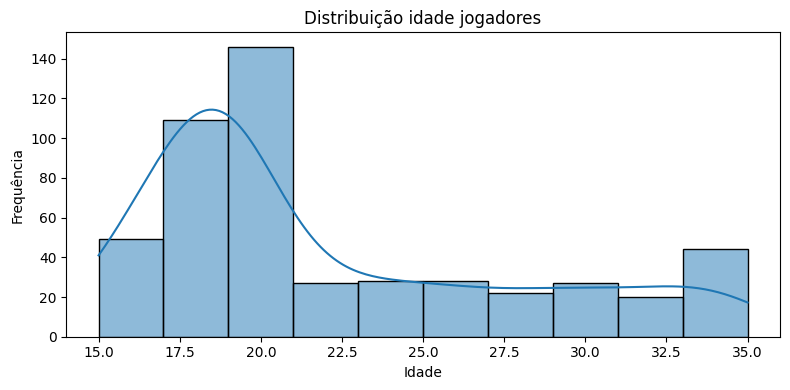

In [101]:
# Distribuição da idade jogadores
plt.figure(figsize=(8, 4))
sns.histplot(df_jogadores["age"], bins=10, kde=True)
plt.title("Distribuição idade jogadores")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

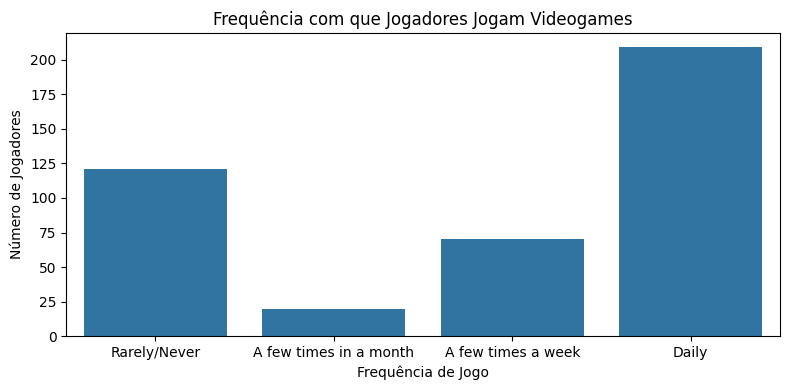

In [102]:
# Distribuição da frequência de jogo

ordem_personalizada = [
    "Rarely/Never",
    "A few times in a month",
    "A few times a week",
    "Daily"
]

plt.figure(figsize=(8, 4))
sns.countplot(data=df_jogadores, x="frequency", order=ordem_personalizada)
plt.title("Frequência com que Jogadores Jogam Videogames")
plt.xlabel("Frequência de Jogo")
plt.ylabel("Número de Jogadores")
plt.tight_layout()
plt.show()

In [103]:
# Olhando o gráfico, é possível converter esses dados categoricos em numericos

Index(['timestamp', 'age', 'gender', 'location', 'frequency', 'hours_per_week',
       'device', 'genres', 'favorite_game', 'discovery_methods',
       'preference_mode', 'monthly_spending', 'motivation'],
      dtype='object')


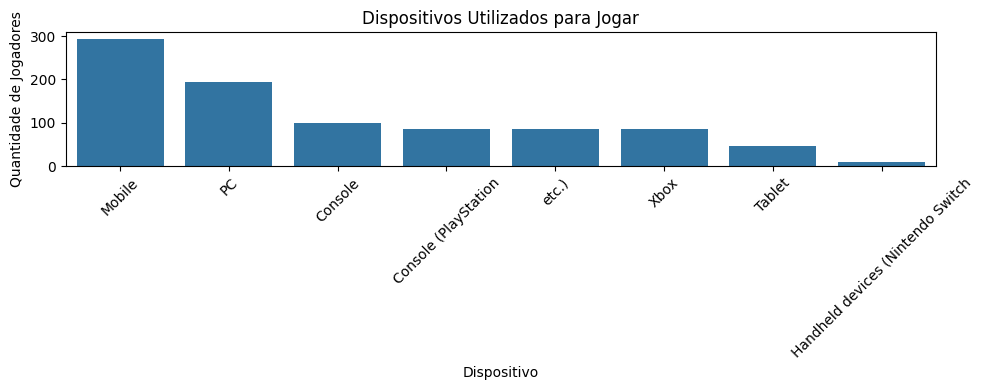

In [104]:
# Import biblioecas
from sklearn.preprocessing import MultiLabelBinarizer

# Separar os dispositivos
print(df_jogadores.columns)
devices_split = df_jogadores["device"].str.split(",\s*")

# Binarizar
mlb_devices = MultiLabelBinarizer()
devices_encoded = pd.DataFrame(
    mlb_devices.fit_transform(devices_split),
    columns=[f"device_{d}" for d in mlb_devices.classes_])

# Concatenar ao DataFrame original
df_jogadores = pd.concat([df_jogadores, devices_encoded], axis=1)

# Dispositivos mais utilizados
dispositivo_cols = [col for col in df_jogadores.columns if col.startswith("device_")]
uso_dispositivos = df_jogadores[dispositivo_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=uso_dispositivos.index.str.replace("device_", ""), y=uso_dispositivos.values)
plt.title("Dispositivos Utilizados para Jogar")
plt.xlabel("Dispositivo")
plt.ylabel("Quantidade de Jogadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

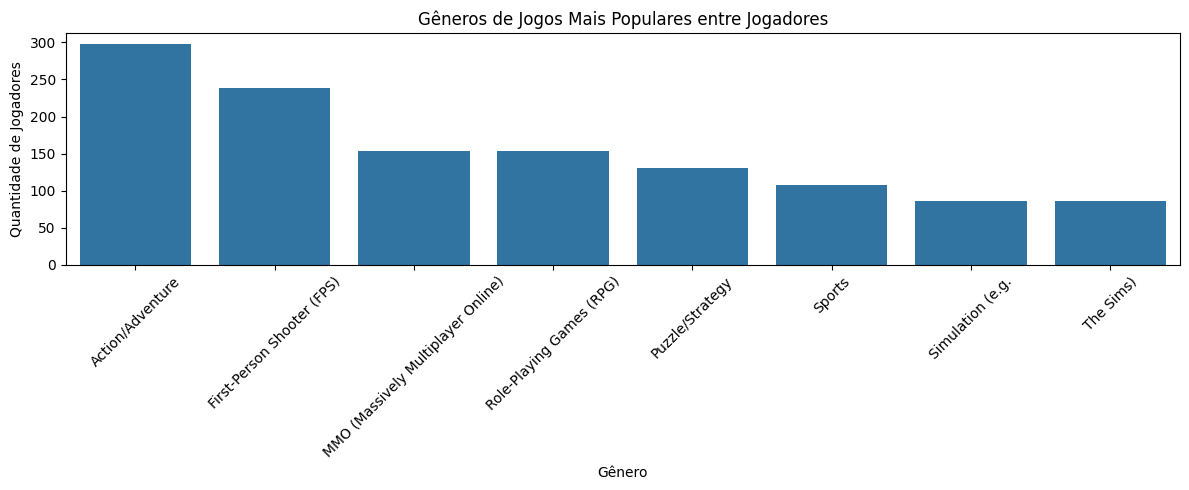

In [105]:
# Gêneros de jogos
# Separar os gêneros da coluna "genres"
genres_split = df_jogadores["genres"].str.split(",\s*")

# Binarizar os gêneros
mlb_genres = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb_genres.fit_transform(genres_split),
    columns=mlb_genres.classes_)

# Concatenar com o DataFrame original
df_jogadores = pd.concat([df_jogadores, genres_encoded], axis=1)

# Identificar as colunas de gênero criadas
genero_cols = mlb_genres.classes_

# Somar a quantidade de jogadores por gênero
uso_generos = df_jogadores[genero_cols].sum().sort_values(ascending=False)

# Plotar o gráfico
plt.figure(figsize=(12, 5))
sns.barplot(x=uso_generos.index, y=uso_generos.values)
plt.title("Gêneros de Jogos Mais Populares entre Jogadores")
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Jogadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

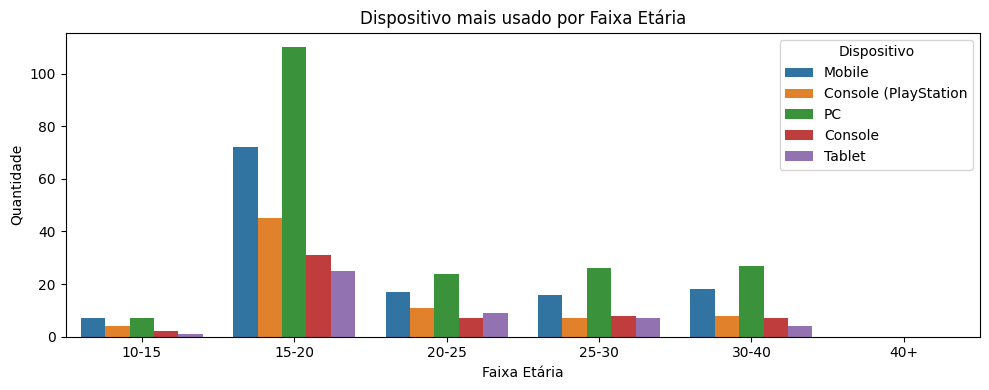

In [106]:
df_jogadores["faixa_etaria"] = pd.cut(df_jogadores["age"], bins=[10, 15, 20, 25, 30, 40, 60], labels=["10-15", "15-20", "20-25", "25-30", "30-40", "40+"])
df_jogadores["device_principal"] = df_jogadores["device"].str.split(",").str[0].str.strip()

plt.figure(figsize=(10, 4))
sns.countplot(data=df_jogadores, x="faixa_etaria", hue="device_principal")
plt.title("Dispositivo mais usado por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade")
plt.legend(title="Dispositivo")
plt.tight_layout()
plt.show()

Com base nos gráficos gerados, é possível observar alguns padrões importantes no perfil dos participantes da pesquisa:

A maior parte dos jogadores está na faixa etária entre 15 e 21 anos, o que reflete uma forte presença do público jovem no universo dos videogames.

A frequência mais comum de jogo é diária, indicando um alto nível de engajamento entre os respondentes.

Os dispositivos mais utilizados para jogar são o mobile e o PC, o que sugere uma preferência por plataformas acessíveis e versáteis.

Em relação aos gêneros de jogos preferidos, destacam-se categorias como Action/Adventure, RPG e FPS, evidenciando uma inclinação por jogos envolventes, com narrativa e/ou desafios de habilidade

**3. Preparação dos dados - Data Preparation**





Na etapa anterior, foi realizada a eliminação de colunas duplicadas, originadas possivelmente por falhas na exportação do formulário. Além disso, foram removidos os espaços em excesso nos nomes das colunas e os títulos foram renomeados para termos mais curtos e padronizados, com o objetivo de facilitar a manipulação e análise dos dados - No dataset de jogadores

In [107]:
print(df_jogadores.columns.tolist())

['timestamp', 'age', 'gender', 'location', 'frequency', 'hours_per_week', 'device', 'genres', 'favorite_game', 'discovery_methods', 'preference_mode', 'monthly_spending', 'motivation', 'device_Console', 'device_Console (PlayStation', 'device_Handheld devices (Nintendo Switch', 'device_Mobile', 'device_PC', 'device_Tablet', 'device_Xbox', 'device_etc.)', 'Action/Adventure', 'First-Person Shooter (FPS)', 'MMO (Massively Multiplayer Online)', 'Puzzle/Strategy', 'Role-Playing Games (RPG)', 'Simulation (e.g.', 'Sports', 'The Sims)', 'faixa_etaria', 'device_principal']


In [108]:
df_jogadores.drop(['location'], axis=1)

,timestamp,age,gender,frequency,hours_per_week,device,genres,favorite_game,discovery_methods,preference_mode,...,Action/Adventure,First-Person Shooter (FPS),MMO (Massively Multiplayer Online),Puzzle/Strategy,Role-Playing Games (RPG),Simulation (e.g.,Sports,The Sims),faixa_etaria,device_principal
0,2024-10-24 13:09:27.109,18,Male,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",Both,...,0,0,0,0,0,0,1,0,15-20,Mobile
1,2024-10-24 13:09:34.343,19,Male,Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,Single-player,...,0,0,0,1,0,1,0,1,15-20,Mobile
2,2024-10-24 13:23:13.403,19,Male,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,Multiplayer,...,0,1,0,0,0,0,0,0,15-20,Console (PlayStation
3,2024-10-24 13:30:42.445,18,Female,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,Both,...,0,0,0,1,0,0,0,0,15-20,Mobile
4,2024-10-24 13:32:26.815,18,Female,Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,Multiplayer,...,1,1,0,0,1,0,0,0,15-20,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-10-25 16:55:00.000,19,Male,Rarely/Never,5-10 hours,PC,Puzzle/Strategy,Subway,Social Media,Both,...,0,0,0,1,0,0,0,0,15-20,PC
496,2024-10-25 16:56:00.000,16,Female,Daily,10-20 hours,"Console (PlayStation, Xbox, etc.)","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,Both,...,1,1,0,0,1,0,0,0,15-20,Console (PlayStation
497,2024-10-25 16:57:00.000,30,Male,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",Sports,Efootball,Social Media,Both,...,0,0,0,0,0,0,1,0,25-30,Console (PlayStation
498,2024-10-25 16:58:00.000,19,Male,Daily,More than 20 hours,PC,"Action/Adventure, First-Person Shooter (FPS), ...",Call of duty,"Social Media, Gaming Forums, Game Reviews/Blog...",Both,...,1,1,1,0,1,0,0,0,15-20,PC


In [109]:
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler

# Dataset dos jogadores:

# Normalizar idade dos jogadores
scaler = MinMaxScaler()
df_jogadores["age_normalized"] = scaler.fit_transform(df_jogadores[["age"]])

# Converter coluna frequência
freq_map = {
    "Rarely/Never": 0,
    "A few times in a month": 1,
    "A few times a week": 2,
    "Daily": 3
}
df_jogadores["frequency_num"] = df_jogadores["frequency"].map(freq_map)

# Converter hours_per_week para valor aproximado
def parse_hours(h):
    h = str(h).lower()
    if "less than" in h:
        return 3
    elif "5-10" in h:
        return 7
    elif "10-20" in h:
        return 15
    elif "more than 20" in h:
        return 25
    elif "30min" in h or "30 min" in h:
        return 0.5
    elif "0" in h: # Handle "0" hours
        return 0
    try:
        return float(h)
    except:
        return np.nan

df_jogadores["hours_num"] = df_jogadores["hours_per_week"].apply(parse_hours) # Apply the function to create the new column


# One-hot encode colunas categoricas simples
categoricas_simples = ["gender", "preference_mode"]
df_onehot = pd.get_dummies(df_jogadores[categoricas_simples], prefix=categoricas_simples)

# MultiLabelBinarizer para colunas de múltipla escolha (genres e device já foi binarizado na etapa anterior)
multicolunas = ["discovery_methods", "motivation"]
df_multilabel = []

for col in multicolunas:
    split_col = df_jogadores[col].astype(str).str.split(",\s*")
    mlb = MultiLabelBinarizer()
    encoded = pd.DataFrame(mlb.fit_transform(split_col), columns=[f"{col}_{c}" for c in mlb.classes_])
    df_multilabel.append(encoded)

# Concatenar tudo ao DataFrame original
df_jogadores_final = pd.concat(
    [df_jogadores,
     df_onehot] + df_multilabel,
    axis=1)

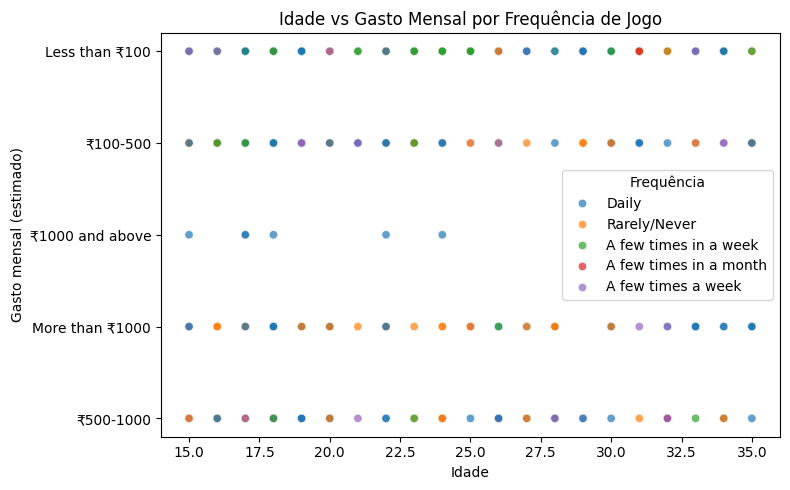

In [110]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_jogadores, x="age", y="monthly_spending", hue="frequency", alpha=0.7)
plt.title("Idade vs Gasto Mensal por Frequência de Jogo")
plt.xlabel("Idade")
plt.ylabel("Gasto mensal (estimado)")
plt.legend(title="Frequência")
plt.tight_layout()
plt.show()

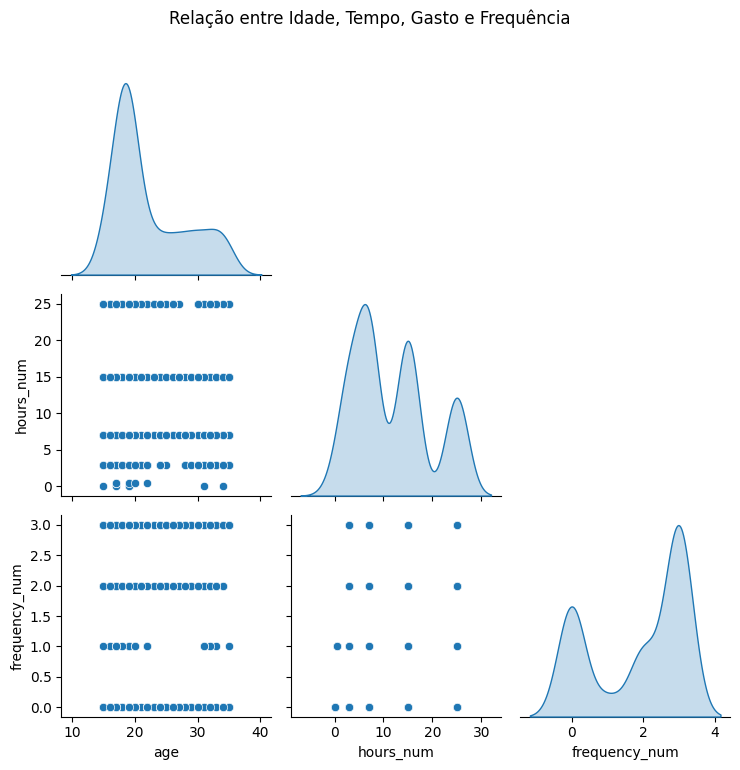

In [111]:
pair_df = df_jogadores[["age", "hours_num", "monthly_spending", "frequency_num"]].dropna()
sns.pairplot(pair_df, diag_kind="kde", corner=True)
plt.suptitle("Relação entre Idade, Tempo, Gasto e Frequência", y=1.02)
plt.tight_layout()
plt.show()

Horas jogadas por semana e frequência de jogo têm uma relação clara: quem joga mais vezes por semana tende a jogar mais horas.

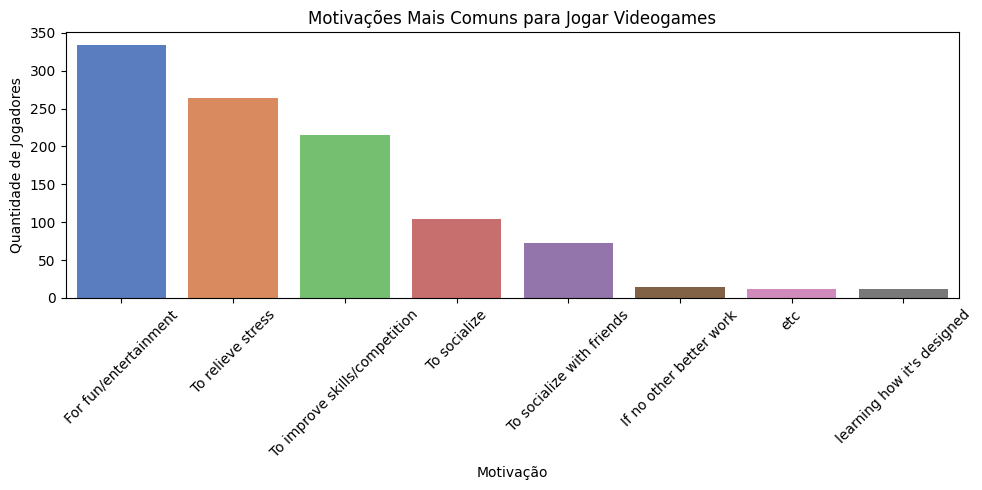

In [112]:
# Selecionar as colunas de motivação já binarizadas
motivation_cols = [col for col in df_jogadores_final.columns if col.startswith("motivation_")]

# Somar quantas vezes cada motivação foi marcada
motivation_counts = df_jogadores_final[motivation_cols].sum().sort_values(ascending=False)

# Limpar o prefixo para exibir no gráfico
motivation_labels = motivation_counts.index.str.replace("motivation_", "")

# Plotar gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=motivation_labels, y=motivation_counts.values, palette="muted")
plt.title("Motivações Mais Comuns para Jogar Videogames")
plt.xlabel("Motivação")
plt.ylabel("Quantidade de Jogadores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
df_jogadores.columns[df_jogadores.columns.duplicated()].tolist()

# Remover duplicatas (se por acaso tem)
df_jogadores = df_jogadores.loc[:, ~df_jogadores.columns.duplicated()]


In [114]:
# Remover colunas categóricas originais (object)
colunas_object = df_jogadores.select_dtypes(include='object').columns.tolist()
df_jogadores_final.drop(columns=colunas_object, inplace=True)

In [115]:
df_jogadores_final.drop(columns=["timestamp"], inplace=True)

In [116]:
df_jogadores_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   age                                                    500 non-null    int64   
 1   device_Console                                         500 non-null    int64   
 2   device_Console (PlayStation                            500 non-null    int64   
 3   device_Handheld devices (Nintendo Switch               500 non-null    int64   
 4   device_Mobile                                          500 non-null    int64   
 5   device_PC                                              500 non-null    int64   
 6   device_Tablet                                          500 non-null    int64   
 7   device_Xbox                                            500 non-null    int64   
 8   device_etc.)                            

In [117]:
df_jogos.isnull().sum()

appid          0
name           0
genres        36
categories    44
dtype: int64

O dataset dos jogos, apresenta valores nulos, pelo que será necessário tratá-los

In [118]:
# Remover linhas sem gênero ou categoria
df_jogos = df_jogos.dropna(subset=["genres", "categories"])

# Separar múltiplos gêneros e categorias
genres_split = df_jogos["genres"].str.split(",\s*")
categories_split = df_jogos["categories"].str.split(",\s*")

# Codificar gêneros e categorias
mlb_genres = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb_genres.fit_transform(genres_split),
                              columns=[f"genre_{g}" for g in mlb_genres.classes_])

mlb_cats = MultiLabelBinarizer()
cats_encoded = pd.DataFrame(mlb_cats.fit_transform(categories_split),
                            columns=[f"cat_{c}" for c in mlb_cats.classes_])

# Concatenar os vetores ao DataFrame
df_jogos = pd.concat([df_jogos.reset_index(drop=True),
                      genres_encoded.reset_index(drop=True),
                      cats_encoded.reset_index(drop=True)], axis=1)

In [119]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 97 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   appid                               1152 non-null   int64 
 1   name                                1152 non-null   object
 2   genres                              1152 non-null   object
 3   categories                          1152 non-null   object
 4   genre_Action                        1152 non-null   int64 
 5   genre_Adventure                     1152 non-null   int64 
 6   genre_Animation & Modeling          1152 non-null   int64 
 7   genre_Audio Production              1152 non-null   int64 
 8   genre_Casual                        1152 non-null   int64 
 9   genre_Design & Illustration         1152 non-null   int64 
 10  genre_Early Access                  1152 non-null   int64 
 11  genre_Education                     1152 non-null   int6

**4. Modelação - Modeling**

In [120]:
pip install scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
print(df_jogadores_final.columns)


Index(['age', 'device_Console', 'device_Console (PlayStation',
       'device_Handheld devices (Nintendo Switch', 'device_Mobile',
       'device_PC', 'device_Tablet', 'device_Xbox', 'device_etc.)',
       'Action/Adventure', 'First-Person Shooter (FPS)',
       'MMO (Massively Multiplayer Online)', 'Puzzle/Strategy',
       'Role-Playing Games (RPG)', 'Simulation (e.g.', 'Sports', 'The Sims)',
       'faixa_etaria', 'age_normalized', 'frequency_num', 'hours_num',
       'gender_Female', 'gender_Male', 'gender_male', 'preference_mode_Both',
       'preference_mode_Multiplayer', 'preference_mode_Single-player',
       'discovery_methods_Friends/Family Recommendations',
       'discovery_methods_Game Reviews/Blogs',
       'discovery_methods_Gaming Forums',
       'discovery_methods_I search myself from playstore',
       'discovery_methods_Social Media',
       'discovery_methods_YouTube/Streaming platforms (Twitch',
       'discovery_methods_etc.)', 'discovery_methods_my own ways!!!',


In [122]:
import pandas as pd

# Depois de tratar os dados...
df_jogadores_final.to_csv("jogadores_tratado.csv", index=False)
df_jogos.to_json("jogos_tratado.json", orient="records")

In [126]:
colunas_float_para_int = ['age_normalized', 'frequency_num', 'hours_num', 'faixa_etaria']
df_jogadores_final=df_jogadores_final.drop(columns=colunas_float_para_int)

In [135]:
import warnings
warnings.filterwarnings("ignore")

import joblib
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, hamming_loss,
    roc_auc_score, f1_score
)

genero_cols = [
    'Action/Adventure', 'First-Person Shooter (FPS)', 'MMO (Massively Multiplayer Online)',
    'Puzzle/Strategy', 'Role-Playing Games (RPG)', 'Simulation (e.g.', 'Sports', 'The Sims)'
]

X = df_jogadores_final.drop(columns=genero_cols)
y = df_jogadores_final[genero_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

names = [
    "AdaBoost",
    "Random Forest",
    "Logistic Regression",
    "Decision Tree",
    "Naive Bayes",
    "Linear SVM",
]

classifiers = [
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, n_jobs=-1, random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    GaussianNB(),
    SVC(kernel="linear", C=0.025, probability=True, random_state=42),
]

resultados = {}
melhor_modelo = None
melhor_score = -1

for name, base_clf in zip(names, classifiers):
    print(f"\nTreinando modelo: {name}")
    clf = MultiOutputClassifier(base_clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    f1_macro_avg = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_micro_avg = f1_score(y_test, y_pred, average='micro', zero_division=0)
    hamming = hamming_loss(y_test, y_pred)
    subset_acc = accuracy_score(y_test.values.tolist(), y_pred.tolist())
    acc_por_genero = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    acc_media = np.mean(acc_por_genero)

    try:
        y_pred_prob = clf.predict_proba(X_test)
        y_score = np.array([prob[:, 1] for prob in y_pred_prob]).T
        roc_auc_micro = roc_auc_score(y_test, y_score, average='micro')
        roc_auc_macro = roc_auc_score(y_test, y_score, average='macro')
    except Exception as e:
        roc_auc_micro = None
        roc_auc_macro = None

    resultados[name] = {
        'model': clf,
        'f1_macro_avg': f1_macro_avg,
        'f1_micro_avg': f1_micro_avg,
        'accuracy_media': acc_media,
        'subset_accuracy': subset_acc,
        'hamming_loss': hamming,
        'accuracy_por_genero': acc_por_genero,
        'roc_auc_micro': roc_auc_micro,
        'roc_auc_macro': roc_auc_macro,
        'classification_report': classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    }

    if f1_macro_avg > melhor_score:
        melhor_score = f1_macro_avg
        melhor_modelo = clf
        melhor_nome = name

joblib.dump(melhor_modelo, "modelo_recomendador.pkl")
joblib.dump(X.columns.tolist(), "colunas_modelo.pkl")
joblib.dump(y.columns.tolist(), "genero_cols.pkl")



Treinando modelo: AdaBoost

Treinando modelo: Random Forest

Treinando modelo: Logistic Regression

Treinando modelo: Decision Tree

Treinando modelo: Naive Bayes

Treinando modelo: Linear SVM


['genero_cols.pkl']

In [132]:
import joblib
colunas = joblib.load("colunas_modelo.pkl")
print(len(colunas))
print(colunas)

31
['age', 'device_Console', 'device_Console (PlayStation', 'device_Handheld devices (Nintendo Switch', 'device_Mobile', 'device_PC', 'device_Tablet', 'device_Xbox', 'device_etc.)', 'gender_Female', 'gender_Male', 'gender_male', 'preference_mode_Both', 'preference_mode_Multiplayer', 'preference_mode_Single-player', 'discovery_methods_Friends/Family Recommendations', 'discovery_methods_Game Reviews/Blogs', 'discovery_methods_Gaming Forums', 'discovery_methods_I search myself from playstore', 'discovery_methods_Social Media', 'discovery_methods_YouTube/Streaming platforms (Twitch', 'discovery_methods_etc.)', 'discovery_methods_my own ways!!!', 'motivation_For fun/entertainment', 'motivation_If no other better work', 'motivation_To improve skills/competition', 'motivation_To relieve stress', 'motivation_To socialize', 'motivation_To socialize with friends', 'motivation_etc', "motivation_learning how it's designed"]


**5. Avaliação - Evaluation**

In [136]:
melhor = resultados[melhor_nome]
print(f"\nMelhor modelo: {melhor_nome}")
print(f"F1-score Macro Médio: {melhor['f1_macro_avg']:.4f}")
print(f"F1-score Micro Médio: {melhor['f1_micro_avg']:.4f}")
print(f"Hamming Loss: {melhor['hamming_loss']:.4f}")
print(f"Subset Accuracy: {melhor['subset_accuracy']:.4f}")
print(f"Accuracy Média por Gênero: {melhor['accuracy_media']:.4f}")

if melhor['roc_auc_micro'] is not None:
    print(f"ROC AUC (micro): {melhor['roc_auc_micro']:.4f}")
    print(f"ROC AUC (macro): {melhor['roc_auc_macro']:.4f}")
else:
    print("ROC AUC não pôde ser calculado.")

df_resultado = pd.DataFrame(melhor['classification_report']).transpose()
print(f"\nRelatório de Classificação ({melhor_modelo}):\n")
print(df_resultado)


Melhor modelo: Decision Tree
F1-score Macro Médio: 0.6980
F1-score Micro Médio: 0.7397
Hamming Loss: 0.1575
Subset Accuracy: 0.3800
Accuracy Média por Gênero: 0.8425
ROC AUC (micro): 0.8930
ROC AUC (macro): 0.8441

Relatório de Classificação (MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                       random_state=42))):

              precision    recall  f1-score  support
0              0.746479  0.828125  0.785185     64.0
1              0.716981  0.826087  0.767677     46.0
2              0.794872  0.775000  0.784810     40.0
3              0.823529  0.608696  0.700000     23.0
4              0.677419  0.840000  0.750000     25.0
5              0.900000  0.642857  0.750000     14.0
6              1.000000  0.173913  0.296296     23.0
7              0.900000  0.642857  0.750000     14.0
micro avg      0.761702  0.718876  0.739669    249.0
macro avg      0.819910  0.667192  0.697996    249.0
weighted avg   0.789668  0.71